In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("FlightsDatabase.csv")

Analisis Exploratorio. 
1. Crear mapa mental set de datos
Fases:
1. Analisis de cada variable individual 
2. Analisis univariado: relacion de cada variable predictora con la variable a predecir
3. Analisis bivariado: relacion de pares de variables predictoras con la variable a predecir.

1. Analisis de cada variable individual

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591110 entries, 0 to 1591109
Data columns (total 32 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Month                   1591110 non-null  int64  
 1   DayofMonth              1591110 non-null  int64  
 2   DayOfWeek               1591110 non-null  int64  
 3   DepTime                 1591110 non-null  float64
 4   CRSDepTime              1591110 non-null  int64  
 5   ArrTime                 1591110 non-null  float64
 6   CRSArrTime              1591110 non-null  int64  
 7   UniqueCarrier           1591110 non-null  object 
 8   FlightNum               1591110 non-null  int64  
 9   TailNum                 1591110 non-null  object 
 10  ActualElapsedTime       1591110 non-null  float64
 11  CRSElapsedTime          1591110 non-null  float64
 12  AirTime                 1591110 non-null  float64
 13  ArrDelay                1591110 non-null  float64
 14  De

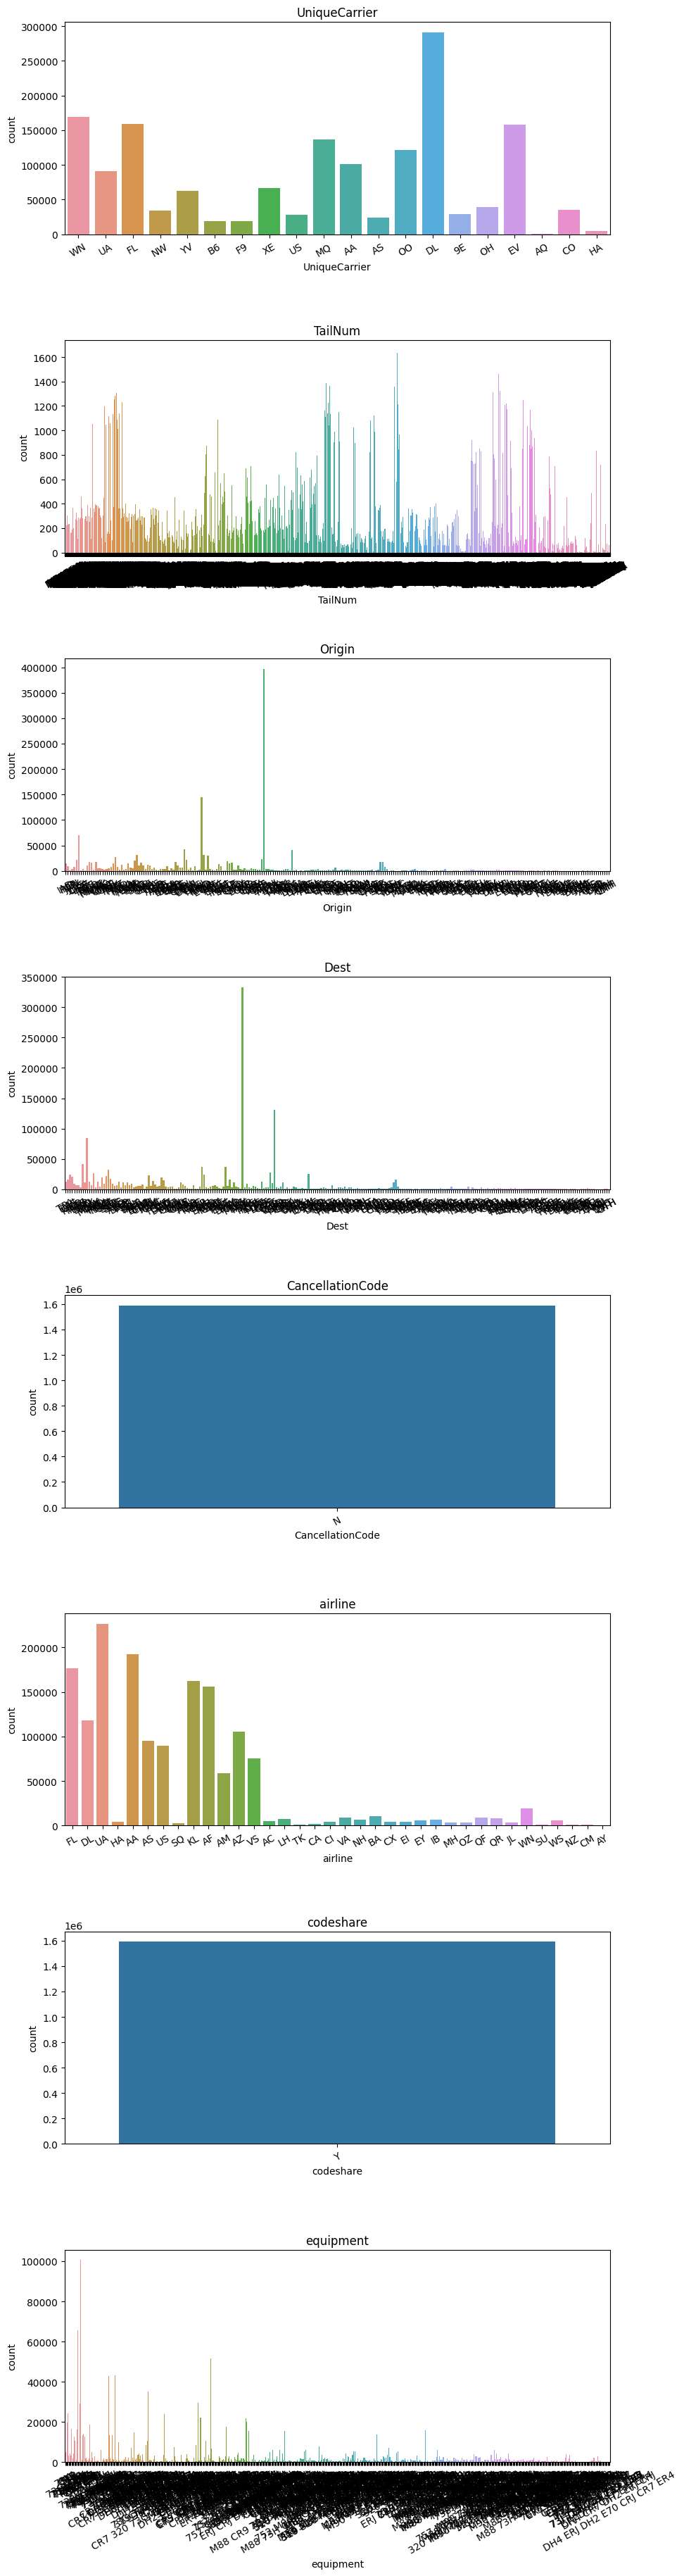

In [5]:
cols_cat = df.select_dtypes(include=['object']).columns
fig, ax = plt.subplots(nrows=len(cols_cat), ncols=1, figsize=(10,45))
fig.subplots_adjust(hspace=0.5)
for i,col in enumerate(cols_cat):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

In [7]:
df.drop(columns=['codeshare', 'CancellationCode'])
df.columns


<bound method DataFrame.info of          Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0            1          13          7   2013.0        1915   2230.0   
1            1          17          4   2019.0        1915   2308.0   
2            1          18          5    811.0         745   1045.0   
3            1          19          6    757.0         745   1030.0   
4            1           5          6   2324.0        2135    139.0   
...        ...         ...        ...      ...         ...      ...   
1591105     12          25          4   1555.0        1525   1820.0   
1591106     12          25          4   1555.0        1525   1820.0   
1591107     12          27          6   1703.0        1525   1924.0   
1591108     12          27          6   1703.0        1525   1924.0   
1591109     12           6          6   1225.0        1116   1612.0   

         CRSArrTime UniqueCarrier  FlightNum TailNum  ...  WeatherDelay  \
0              2145            WN       

In [9]:
df.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,airline ID,source airport id,destination airport id
count,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,...,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06,1.591110e+06
mean,6.236387e+00,1.578890e+01,4.011955e+00,1.564343e+03,1.493522e+03,1.621315e+03,1.650906e+03,2.409374e+03,1.241910e+02,1.196822e+02,...,8.020190e+00,2.145859e+01,1.872977e+01,3.685085e+00,1.620532e+01,6.594390e-02,2.487764e+01,2.247809e+03,3.703643e+03,3.705755e+03
std,3.540195e+00,8.798121e+00,1.999222e+00,4.554168e+02,4.212296e+02,5.725468e+02,4.502483e+02,2.082277e+03,6.095218e+01,5.767051e+01,...,6.564251e+00,1.665653e+01,4.190178e+01,2.104708e+01,3.531199e+01,1.919780e+00,4.184414e+01,2.055127e+03,2.110946e+02,2.226841e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,1.000000e+00,1.700000e+01,-2.100000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,2.883000e+03,2.883000e+03
25%,3.000000e+00,8.000000e+00,2.000000e+00,1.233000e+03,1.155000e+03,1.327000e+03,1.338000e+03,6.780000e+02,8.200000e+01,8.000000e+01,...,4.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.210000e+02,3.585000e+03,3.577000e+03
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.621000e+03,1.530000e+03,1.732000e+03,1.715000e+03,1.624000e+03,1.120000e+02,1.090000e+02,...,6.000000e+00,1.700000e+01,1.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,7.000000e+00,1.316000e+03,3.682000e+03,3.682000e+03
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.927000e+03,1.835000e+03,2.048000e+03,2.020000e+03,4.241000e+03,1.460000e+02,1.400000e+02,...,9.000000e+00,2.500000e+01,2.100000e+01,0.000000e+00,1.600000e+01,0.000000e+00,3.200000e+01,5.209000e+03,3.807000e+03,3.817000e+03
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.740000e+03,1.114000e+03,5.330000e+02,...,2.400000e+02,4.220000e+02,1.542000e+03,1.352000e+03,1.137000e+03,3.920000e+02,1.316000e+03,5.416000e+03,7.051000e+03,7.051000e+03


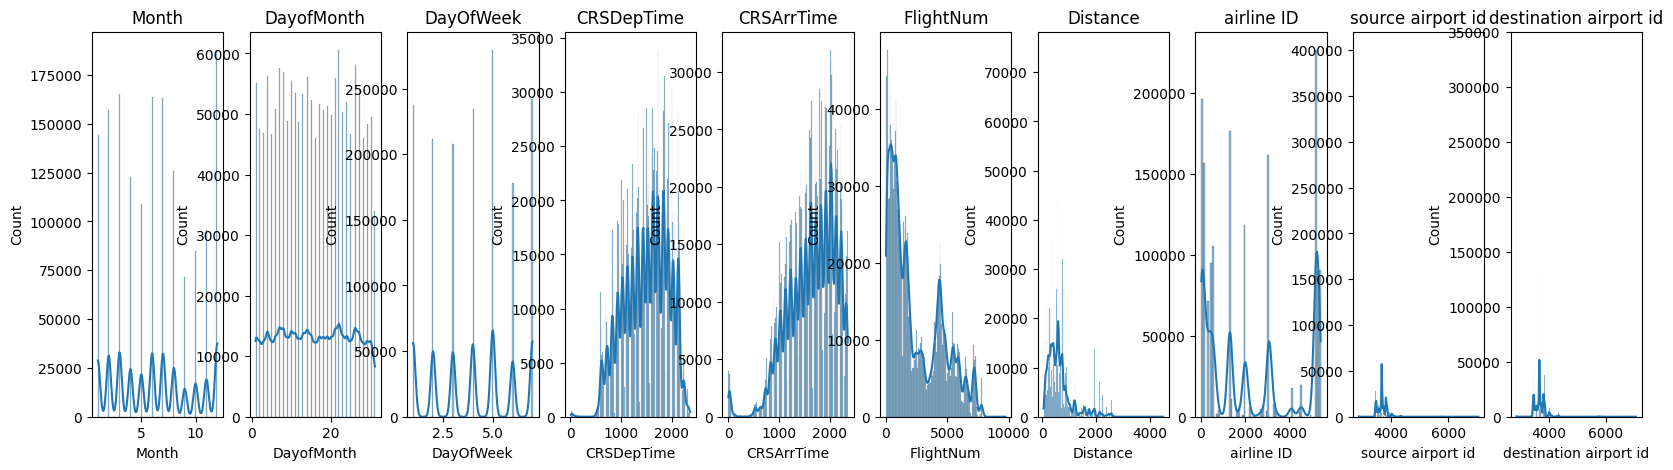

In [22]:
cols_num = df.select_dtypes(include=['int64']).columns
fig, ax = plt.subplots(nrows=1, ncols= len(cols_num), figsize=(15,5))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(cols_num):
    sns.histplot(x=col, data=df, ax=ax[i], kde= True)
    ax[i].set_title(col)
